### Problem 1
Implement coordinate descent with analytic line search for Matyas function:
$$f(x,y) = 0.26(x^2 + y^2) - 0.48xy$$
on the interval $[-10;10] \times [-10;10]$. Plot the behavior of the optimization process on the contour map of the function. 

Useful function: `pyplot.contour`, `np.meshgrid`

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

In [1]:
def f(x, y):
    return 0.26*(x**2 + y**2) - 0.48*x*y

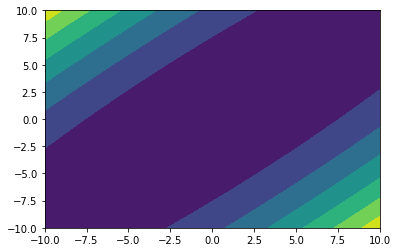

In [3]:
# plotting function contour map
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(x,y, sparse=True)
z = f(xx, yy)
plt.contourf(x,y,z)
plt.show()

Converged in 60 iterations


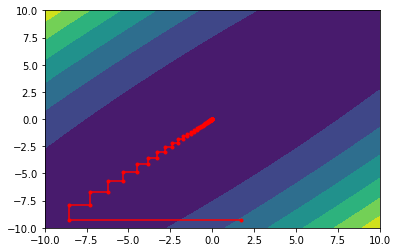

In [9]:
eps = 1e-4
x_old, y_old = np.random.random()*20-10, np.random.random()*20-10

p_hist = [[x_old, y_old]]

for i in range(100):
    # min in x direction
    x_new = 12*y_old/13
    p_hist.append([x_new, y_old])
    x_old = x_new
    # min in y direction
    y_new = 12*x_old/13
    p_hist.append([x_old, y_new])
    y_old = y_new
    
    # check if converges
    dist = np.sqrt((p_hist[-1][0]-p_hist[-2][0])**2 + (p_hist[-1][1]-p_hist[-2][1])**2)
    if dist < eps:
        print(f'Converged in {i} iterations')
        break

p_hist = np.array(p_hist)
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(x,y, sparse=True)
z = f(xx, yy)
plt.contourf(x,y,z)
plt.plot(p_hist[:,0], p_hist[:,1], 'r.-')
plt.show()

### Problem 2
Implement gradient descent with momentum for Matyas function with analytical and approximated gradient:
$$f(x,y) = 0.26(x^2 + y^2) - 0.48xy$$
on the interval $[-10;10] \times [-10;10]$. Plot the behavior of the optimization process on the contour map of the function. 

Useful function: `pyplot.contour`, `np.meshgrid`

In [10]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

In [11]:
def f(x, y):
    return 0.26*(x**2 + y**2) - 0.48*x*y

In [12]:
def df(x, y):
    return np.array([0.52*x-0.48*y, 0.52*y-0.48*x])

Converged in 197 iterations
final point:(0.0016483588286298277,0.0016483588286298277), final value: 1.0868347311687593e-07


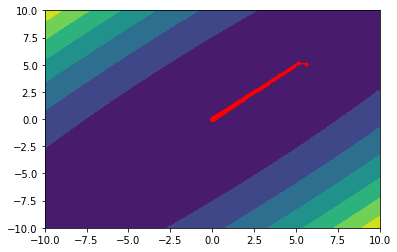

In [19]:
t = 1
eps = 1e-4
p = np.random.random(size=2)*20-10

p_hist = [p]

for i in range(1000):
    p = p - t*df(p[0], p[1])
    p_hist.append(p)
    
    dist  = np.sqrt(np.sum((p_hist[-1]-p_hist[-2])**2))
    if dist < eps:
        print(f'Converged in {i} iterations')
        break

print(f'final point:({p_hist[-1][0]},{p_hist[-1][1]}), final value: {f(p_hist[-1][0],p_hist[-1][1])}')
        
p_hist = np.array(p_hist)
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(x,y, sparse=True)
z = f(xx, yy)
plt.contourf(x,y,z)
plt.plot(p_hist[:,0], p_hist[:,1], 'r.-')
plt.show()

Converged in 82 iterations
final point:(-0.0006642564790397574,-0.0006642564810299385), final value: 1.7649466850731514e-08


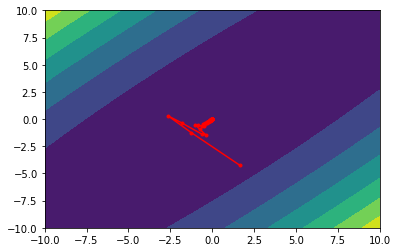

In [28]:
t = 1
gamma = 0.5
p = np.random.random(size=2)*20-10
v = np.array([0, 0])

p_hist = [p]

for i in range(1000):
    v = gamma*v + t*df(p[0], p[1])
    p = p - v
    p_hist.append(p)
    
    dist  = np.sqrt(np.sum((p_hist[-1]-p_hist[-2])**2))
    if dist < eps:
        print(f'Converged in {i} iterations')
        break

print(f'final point:({p_hist[-1][0]},{p_hist[-1][1]}), final value: {f(p_hist[-1][0],p_hist[-1][1])}')
        
p_hist = np.array(p_hist)
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(x,y, sparse=True)
z = f(xx, yy)
plt.contourf(x,y,z)
plt.plot(p_hist[:,0], p_hist[:,1], 'r.-')
plt.show()

### Problem 3
Implement gradient descent with Golden Ratio line search for Goldstein–Price function:
$$f(x,y)=\left[1+\left(x+y+1\right)^{2}\left(19-14x+3x^{2}-14y+6xy+3y^{2}\right)\right]
\left[30+\left(2x-3y\right)^{2}\left(18-32x+12x^{2}+48y-36xy+27y^{2}\right)\right]$$
on the interval $[-10;10] \times [-10;10]$. Plot the behavior of the optimization process on the contour map of the function. Find gradients using finite difference approximation.

Useful function: `pyplot.contour`, `np.meshgrid`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

In [63]:
# во время онлайн занятия ошибка была в определении функции: вместо 18 я случайно написал 8
x_min, y_min = -2, -2
x_max, y_max = 2, 2
def f(x, y):
    A = (1+(x+y+1)**2 * (19-14*x+3*x**2-14*y+6*x*y+3*y**2))
    B = (30 + (2*x-3*y)**2 * (18-32*x+12*x**2 + 48*y-36*x*y+27*y**2))
    return A*B

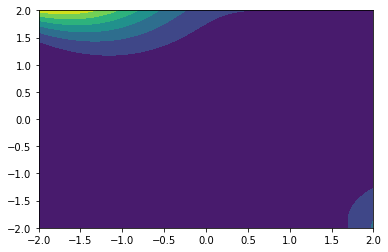

In [64]:
# plotting function contour map
x = np.linspace(x_min, x_max, 100)
y = np.linspace(y_min, y_max, 100)
xx, yy = np.meshgrid(x,y, sparse=True)
z = f(xx, yy)
plt.contourf(x,y,z)
plt.show()

In [40]:
def df(x, y, eps=1e-6):
    dx = (f(x+eps, y) - f(x-eps, y))/(2*eps)
    dy = (f(x, y+eps) - f(x, y-eps))/(2*eps)
    return np.array([dx, dy])

In [66]:
def line_search(p, d, eps=1e-4):
    if d[0]!=0:    
        l_x_min = (x_max-p[0])/d[0]
        l_x_max = (x_min-p[0])/d[0]
    if d[1]!=0:
        l_y_min = (y_max-p[1])/d[1]
        l_y_max = (y_min-p[1])/d[1]
    l_min = max(l_x_min, l_y_min)
    l_max = min(l_x_max, l_y_max)
    a = p + l_min * d
    b = p + l_max * d

    for i in range(100):       
        x1 = a + 0.382*(b-a)
        x2 = a + 0.618*(b-a)

        u1 = f(x1[0], x1[1])
        u2 = f(x2[0], x2[1])

        if u1 == u2:
            a = x1
            b = x2
        if u1 > u2:
            a = x1
        if u1 < u2:
            b = x2

        if np.sqrt(np.sum((a-b)**2)) < eps:
            break
    return (a+b)/2
        

Converged in 6 iterations
final point:(-2.3553218925435868e-05,-1.0000192267947186), final value: 3.0000002016838305


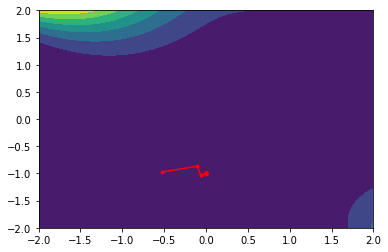

In [67]:
eps = 1e-4
p = np.random.random(size=2)*(x_max-x_min)+x_min

p_hist = [p]

for i in range(1000):
    d = df(p[0], p[1])
    p_new = line_search(p, d/np.linalg.norm(d))
    p = p_new
    p_hist.append(p_new)
    
    dist  = np.sqrt(np.sum((p_hist[-1]-p_hist[-2])**2))
    if dist < eps:
        print(f'Converged in {i} iterations')
        break

print(f'final point:({p_hist[-1][0]},{p_hist[-1][1]}), final value: {f(p_hist[-1][0],p_hist[-1][1])}')
        
p_hist = np.array(p_hist)
x = np.linspace(x_min, x_max, 100)
y = np.linspace(y_min, y_max, 100)
xx, yy = np.meshgrid(x,y, sparse=True)
z = f(xx, yy)
plt.contourf(x,y,z)
plt.plot(p_hist[:,0], p_hist[:,1], 'r.-')
plt.show()

### Problem 4
Implement gradient descent with Golden Ratio line search for Goldstein–Price function:
$$f(x,y)=\left[1+\left(x+y+1\right)^{2}\left(19-14x+3x^{2}-14y+6xy+3y^{2}\right)\right]
\left[30+\left(2x-3y\right)^{2}\left(18-32x+12x^{2}+48y-36xy+27y^{2}\right)\right]$$
on the interval $[-10;10] \times [-10;10]$. Plot the behavior of the optimization process on the contour map of the function. Find gradients analytically.

Useful function: `pyplot.contour`, `np.meshgrid`

### Problem 5
Implement coordinate descent with Nesterov momentum for McCormick function ([link](https://www.sfu.ca/~ssurjano/mccorm.html)):
$$f(x,y) = \sin(x+y) + (x-y)^2-1.5x+2.5y+1$$
on the interval $[-1.5;4] \times [-3;4]$. Plot the behavior of the optimization process on the contour map of the function. Select starting point randomly as in previous problems.

Useful function: `pyplot.contour`, `np.meshgrid`